# Een histogram
Een histogram wordt gebruikt wanneer we data in 'bins' willen vergelijken. We gebruiken hiervoor de Titanic dataset.

In [ ]:
from pathlib import Path 

from zipfile import ZipFile
import requests
URL="https://www.kaggle.com/api/v1/datasets/download/yasserh/titanic-dataset"
TITANIC_ZIP = "titanic.zip"
titanic_path = Path(TITANIC_ZIP)
if not titanic_path.exists():
    data = requests.get(URL)
    with open(TITANIC_ZIP,"wb") as f:
        f.write(data.content)
    with open(TITANIC_ZIP, 'rb') as f:
        ZipFile(f).extractall()

## lees de data

In [ ]:
import pandas as pd
TITANIC_CSV = 'Titanic-Dataset.csv'
df = pd.read_csv(TITANIC_CSV)
df.head()

## bekijk de kolommen
We zien dat de Age-kolom NA-waarden bevat

In [ ]:
df.info()

## Alleen bekende leeftijden gebruiken

In [ ]:
leeftijden = df.Age.dropna() # Geeft een Series terug
leeftijden.info()

# Plot een histogram
Een 'vuistregel' voor het aantal bins: vierkantswortel van het aantal items

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
aantal_bins = int(np.sqrt(leeftijden.shape[0]))
aantallen, grenzen, _ = plt.hist(leeftijden, bins=aantal_bins) #derde returnwaarde bevat de grafiek
plt.title("Leeftijdsverdeling van Titanic-passagiers")
plt.xlabel("Leeftijd")
plt.ylabel("Aantal passagiers")
plt.show()

# Hoe is die automatische verdeling gebeurd?
Blijkbaar waren er 30 kinderen tussen 0,42 en 3,48 jaar. De verdeling is nu natuurlijk random. 

In [ ]:
for index, aantal in enumerate(aantallen):
    print(f"{aantal} passagiers in [{grenzen[index]:.2f}:{grenzen[index+1]:.2f})")

## Wat zijn de min- en maxleeftijden

In [ ]:
leeftijden.describe()

## Een meer logische verdeling
- kinderen: tot en met 12 jaar
- adolescenten: 13 tot en 20
- jongvolwassenen: 21 tot 40
- volwassenen: 41 tot en met 60
- ouderen: ouder dan 60 (tot en met 80)

In [ ]:
verdeling = plt.hist(leeftijden, bins=[0, 13, 21, 41, 61, 80])
plt.title("Leeftijdsverdeling van Titanic-passagiers")
plt.xlabel("Leeftijd")
plt.ylabel("Aantal passagiers")
plt.show()

## Vergelijking mannen en vrouwen op basis van leeftijd

In [5]:
mannen_leeftijd = df.loc[df.Sex == 'male', "Age"].dropna()
display(mannen_leeftijd.head())
vrouwen_leeftijd = df.loc[df.Sex == 'female', "Age"].dropna()
display(vrouwen_leeftijd.head())

0     22.0
4     35.0
6     54.0
7      2.0
12    20.0
Name: Age, dtype: float64

1    38.0
2    26.0
3    35.0
8    27.0
9    14.0
Name: Age, dtype: float64

## plot twee histogrammen
Als we willen vergelijken, moeten we zorgen dat beide grafieken dezelfde y-schaling gebruiken (sharey)

In [ ]:
grensleeftijden = [0, 13, 21, 41, 61, 80]
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
ax[0].hist(vrouwen_leeftijd, grensleeftijden)
ax[0].set_title('Leeftijdsverdeling vrouwen')
ax[0].set_xlabel('leeftijd')
ax[1].hist(mannen_leeftijd, grensleeftijden)
ax[1].set_title('Leeftijdsverdeling mannen')
ax[1].set_xlabel('leeftijd')
plt.show()

## Overlevingskans in een grafiek

In [ ]:
grensleeftijden = [0, 13, 21, 41, 61, 80]
overleefd_leeftijden = df.loc[df.Survived==1, 'Age'].dropna()
niet_overleefd_leeftijden = df.loc[df.Survived==0, 'Age'].dropna()
plt.hist(overleefd_leeftijden, bins=grensleeftijden, alpha=0.6, label='Overleefd')
plt.hist(niet_overleefd_leeftijden, bins=grensleeftijden, alpha=0.6, label='Niet overleefd')
plt.legend()
plt.title('Leeftijdsverdeling en overleving')
plt.xlabel('Leeftijd')
plt.ylabel('Aantal passagiers')
plt.show()

## Probleem van de kleuren die gemengd worden
We kunnen dit misschien oplossen door een rand toe te voegen

In [ ]:
grensleeftijden = [0, 13, 21, 41, 61, 80]
overleefd_leeftijden = df.loc[df.Survived==1, 'Age'].dropna()
niet_overleefd_leeftijden = df.loc[df.Survived==0, 'Age'].dropna()
plt.hist(overleefd_leeftijden, bins=grensleeftijden, alpha=0.6, label='Overleefd', edgecolor='black')
plt.hist(niet_overleefd_leeftijden, bins=grensleeftijden, alpha=0.6, label='Niet overleefd', edgecolor='black')
plt.legend()
plt.title('Leeftijdsverdeling en overleving')
plt.xlabel('Leeftijd')
plt.ylabel('Aantal passagiers')
plt.show()

## Alternatief: naast elkaar zetten
Eigenlijk is een histogram een soort bargrafiek. Bij een bargrafiek staan de bars naast elkaar. Dat zien we wanneer we een array van Series meegeven. (histtype='bar' is de defaultwaarde)

In [ ]:
grensleeftijden = [0, 13, 21, 41, 61, 80]
overleefd_leeftijden = df.loc[df.Survived==1, 'Age'].dropna()
niet_overleefd_leeftijden = df.loc[df.Survived==0, 'Age'].dropna()
plt.hist([overleefd_leeftijden, niet_overleefd_leeftijden], #het verschil zit in deze array
         bins=grensleeftijden, 
         label=['Overleefd', 'Niet overleefd'], 
         histtype='bar') #dit is de default

plt.legend()
plt.title('Leeftijdsverdeling en overleving')
plt.xlabel('Leeftijd')
plt.ylabel('Aantal passagiers')
plt.show()

## Step-histogram
Het probleem met de vorige oplossing (vind ik) is dat de bins minder duidelijk worden. Zijn er 150 overlevenden tussen 21 en 30 jaar of tussen 21 en 40? We kunnen het probleem van de overlappende kleuren misschien oplossen door de balken niet te vullen.

In [ ]:
grensleeftijden = [0, 13, 21, 41, 61, 80]
overleefd_leeftijden = df.loc[df.Survived==1, 'Age'].dropna()
niet_overleefd_leeftijden = df.loc[df.Survived==0, 'Age'].dropna()
plt.hist(overleefd_leeftijden, bins=grensleeftijden, alpha=0.6, label='Overleefd', histtype='step')
plt.hist(niet_overleefd_leeftijden, bins=grensleeftijden, alpha=0.6, label='Niet overleefd', histtype='step')
plt.legend()
plt.title('Leeftijdsverdeling en overleving')
plt.xlabel('Leeftijd')
plt.ylabel('Aantal passagiers')
plt.show()

## Bar labels
Ik denk dat het duidelijker is wanneer we beide plots niet combineren. Met .bar_label kunnen we de aantallen vermelden bij elke bar.

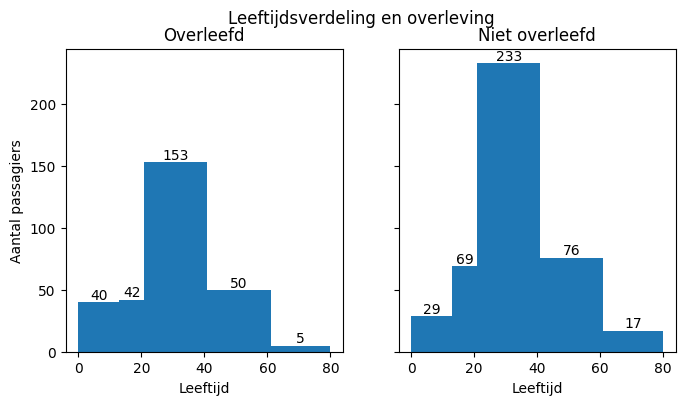

In [8]:
grensleeftijden = [0, 13, 21, 41, 61, 80]
overleefd_leeftijden = df.loc[df.Survived==1, 'Age'].dropna()
niet_overleefd_leeftijden = df.loc[df.Survived==0, 'Age'].dropna()
cm = 1/2.54
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20*cm, 10*cm))
aantallen, _, bars = ax[0].hist(overleefd_leeftijden, bins=grensleeftijden)
ax[0].set_title('Overleefd')
ax[0].bar_label(bars, labels=[f'{int(c)}' for c in aantallen], label_type='edge')
aantallen, _, bars = ax[1].hist(niet_overleefd_leeftijden, bins=grensleeftijden)
ax[1].set_title('Niet overleefd')
ax[1].bar_label(bars, labels=[f'{int(c)}' for c in aantallen], label_type='edge')
fig.suptitle('Leeftijdsverdeling en overleving')
ax[0].set_xlabel('Leeftijd')
ax[1].set_xlabel('Leeftijd')
ax[0].set_ylabel('Aantal passagiers')
plt.show()

## Een density histogram
De aantallen tussen 'overleefd' en 'niet-overleefd' verschillen sterk. Dan kan het handig zijn om een 'density'-histogram te maken. De totale oppervlakte van alle 'staven' is dan gelijk aan 1. De y-as toont dan de dichtheid:

$$dichtheid = \frac{aantal in bin}{N * binbreedte}$$
Je maakt van plt.hist een density-plot door de optie *density=True* toe te voegen.

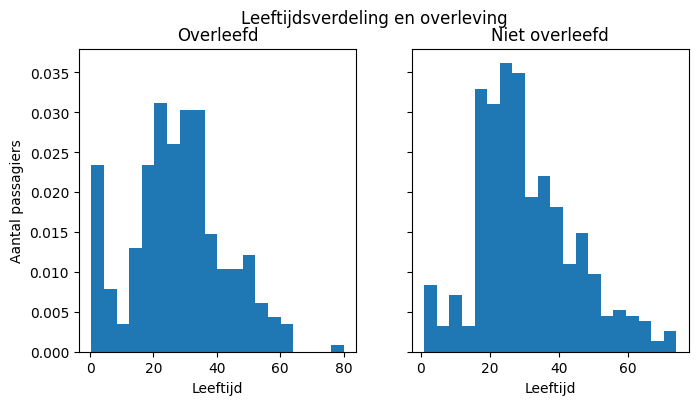

In [ ]:
overleefd_leeftijden = df.loc[df.Survived==1, 'Age'].dropna()
niet_overleefd_leeftijden = df.loc[df.Survived==0, 'Age'].dropna()
cm = 1/2.54
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20*cm, 10*cm))
ax[0].hist(overleefd_leeftijden, bins=20, density=True)
ax[0].set_title('Overleefd')
ax[1].hist(niet_overleefd_leeftijden, bins=20, density=True)
ax[1].set_title('Niet overleefd')
fig.suptitle('Leeftijdsverdeling en overleving')
ax[0].set_xlabel('Leeftijd')
ax[1].set_xlabel('Leeftijd')
ax[0].set_ylabel('Aantal passagiers')
plt.show()

## Is de data normaalverdeeld?
We kunnen de theoretische normaalverdeling bij op de grafiek zetten. Hiervoor berekenen we het gemiddelde en de standaardafwijking voor beide leeftijdsets.

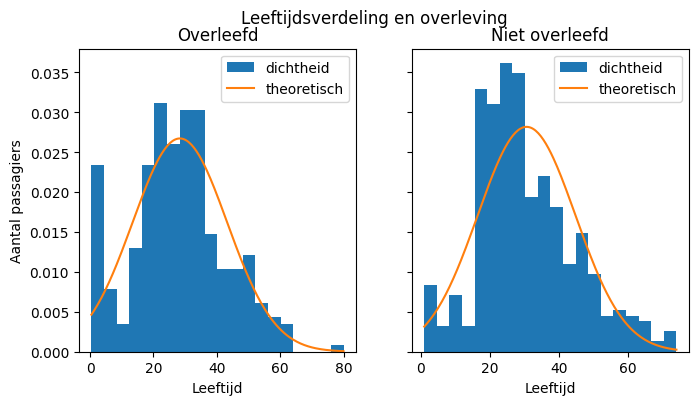

In [ ]:
from scipy.stats import norm
mu_overleefd, sigma_overleefd = np.mean(overleefd_leeftijden), np.std(overleefd_leeftijden)
mu_niet_overleefd, sigma_niet_overleefd = np.mean(niet_overleefd_leeftijden), np.std(niet_overleefd_leeftijden)
cm = 1/2.54
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20*cm, 10*cm))
ax[0].hist(overleefd_leeftijden, bins=20, density=True, label='dichtheid')
x_overleefd = np.linspace(overleefd_leeftijden.min(), overleefd_leeftijden.max(), 200)
ax[0].plot(x_overleefd, norm.pdf(x_overleefd, mu_overleefd, sigma_overleefd), label='theoretisch')
ax[0].set_title('Overleefd')
ax[0].legend()
ax[1].hist(niet_overleefd_leeftijden, bins=20, density=True, label='dichtheid')
x_niet_overleefd = np.linspace(niet_overleefd_leeftijden.min(), niet_overleefd_leeftijden.max(), 200)
ax[1].plot(x_niet_overleefd, norm.pdf(x_niet_overleefd, mu_niet_overleefd, sigma_niet_overleefd), label='theoretisch')
ax[1].set_title('Niet overleefd')
ax[1].legend()
fig.suptitle('Leeftijdsverdeling en overleving')
ax[0].set_xlabel('Leeftijd')
ax[1].set_xlabel('Leeftijd')
ax[0].set_ylabel('Aantal passagiers')
plt.show()
